### 1. Purpose of this notebook

The purpose of this notebook is to explore the customers' data looking for insigths, discoveries and knowledge.

### What's the question we want to answer with this notebook?

i) Who are our customers or who are our principal customers (majority)?

ii) Which customer profile buys most (products)?

iii) Which customer profile buys most (revenue)?

iv) Which customer profile buys most interact on the channels?

### 2. Read data

#### 2.1 Import Python packages

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import src.data_visualization as dv
from src.paths import DATA

%matplotlib inline
plt.style.use('bmh')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'MntTotal',
       'NumTotalPurchases', 'AcceptedTotalFirstFiveCmps',
       'AcceptedTotalFirstFiveCmpsMorePilot', 'TotalYearAfterRegistration'],
      dtype='object')

In [177]:
dtypes = {'ID': str}
columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain', 'Age', 'MntTotal', 'NumTotalPurchases',
       'AcceptedTotalFirstFiveCmps', 'AcceptedTotalFirstFiveCmpsMorePilot', 'TotalYearAfterRegistration', 'TotalChildren']

df = pd.read_csv(DATA / 'ml_project1_data_pre_processed.csv', dtype=dtypes, usecols=columns)

#### 2.2 Sample data

In [178]:
df.sample(5)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,Complain,Age,MntTotal,NumTotalPurchases,AcceptedTotalFirstFiveCmps,AcceptedTotalFirstFiveCmpsMorePilot,TotalYearAfterRegistration,TotalChildren
234,3233,PhD,Married,62745.0,0,1,89,562,21,464,...,11,5,False,55,1085,26,0,0,7,1
886,7023,PhD,Single,46231.0,2,1,87,189,2,55,...,4,9,False,67,251,11,0,0,8,3
146,10837,Graduation,Married,23957.0,1,0,47,2,1,18,...,3,6,False,45,52,5,0,1,8,1
1962,6355,Graduation,Married,44359.0,1,1,19,20,0,14,...,4,3,False,42,44,6,0,0,6,2
2051,4426,Graduation,Single,55801.0,1,1,35,367,4,51,...,6,7,False,45,432,15,1,1,7,2


#### 1. Who are our customers or who are our principal customers (majority)?

#### Age

count    2237.000000
mean       51.098346
std        11.701917
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

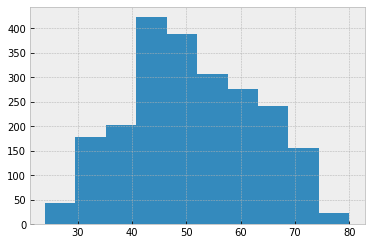

In [205]:
df.query("Age < 115")['Age'].hist()
df.query("Age < 115")['Age'].describe()

75% of our customers are more than 43 years old. Most are middle aged.

#### Education

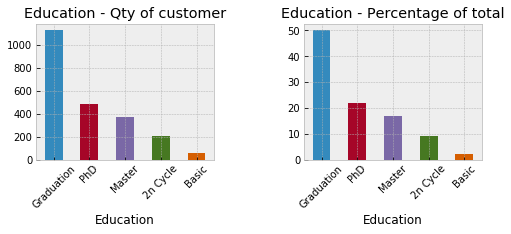

In [179]:
dv.qty_and_percentage(df, 'Education')

Is possible to see that our customers are principaly graduated and post graduated (more than 85%). Are more qualified customers.

#### Marital_Status

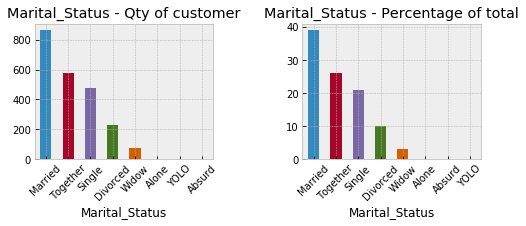

In [180]:
dv.qty_and_percentage(df, 'Marital_Status')

Most of our customers are married or together.

#### Kidhome

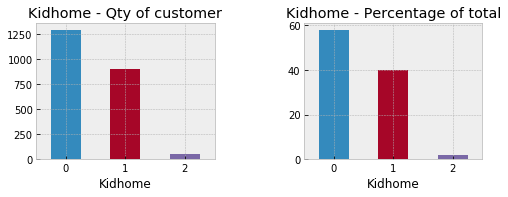

In [181]:
dv.qty_and_percentage(df, 'Kidhome', rotation=0)

#### Teenhome

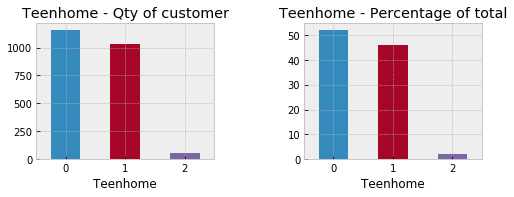

In [182]:
dv.qty_and_percentage(df, 'Teenhome', rotation=0)

#### Total children

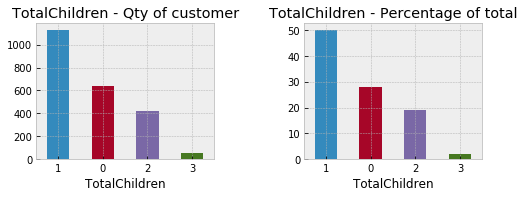

In [183]:
dv.qty_and_percentage(df, 'TotalChildren', rotation=0)

Most of our customers have more than 1 children (more than 70%).

#### Complain

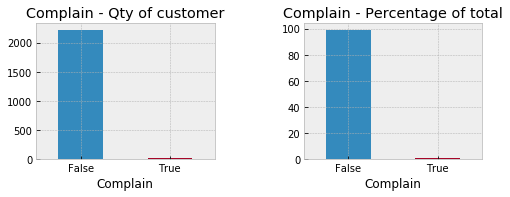

In [175]:
dv.qty_and_percentage(df, 'Complain', rotation=0)

The majority of our customers have not complained in the past two years.

#### Income

In [226]:
income_not_null_values = df[df['Income'].notnull()]['Income']

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

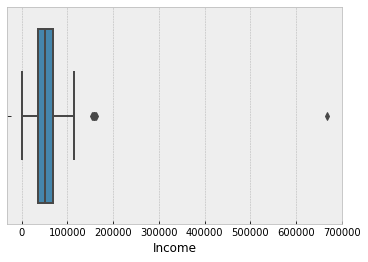

In [227]:
sns.boxplot(x=income_not_null_values);
income_not_null_values.describe()

75% of customers have an income below '$'690.000. But, there are some outliers.

If we check how many customers have an income greater than upper bound (iqr method), we will see that there are few (just 8).

In [230]:
q1, q3= np.percentile(income_not_null_values,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

df.query(f'Income > {upper_bound}')['Income']

164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64

Let's remove this customers and check again if there are some outliers.

count      2208.000000
mean      51633.638134
std       20713.376530
min        1730.000000
25%       35196.000000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64

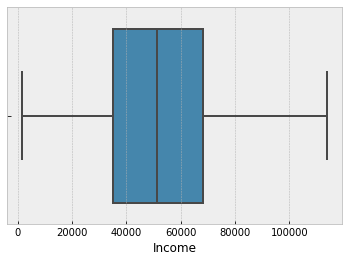

In [255]:
income_outliers_removed = income_not_null_values[income_not_null_values < upper_bound]

sns.boxplot(x=income_outliers_removed)
income_outliers_removed.describe()

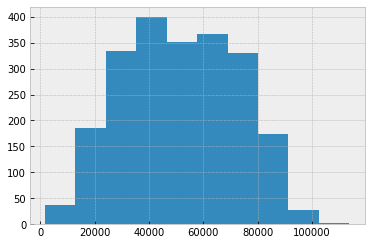

In [249]:
income_outliers_removed.hist();

Great. The outliers are removed.

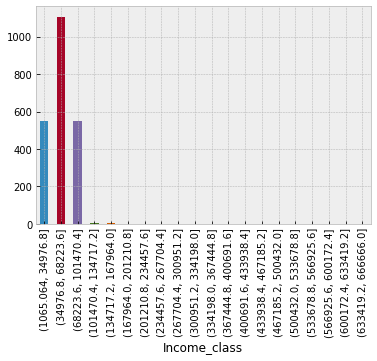

In [165]:
(df
 .assign(Income_class = pd.cut(df['Income'], bins=20))
 
).groupby('Income_class')['Income'].count().plot.bar()

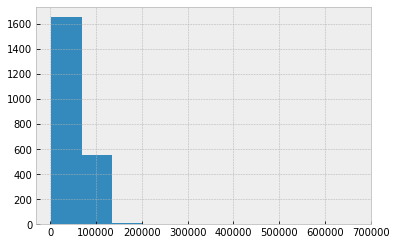

In [163]:
df['Income'].hist()

### Temos clientes mais antigos ou mas novos?

In [6]:
current_year = datetime.date.today().year
df = (df.assign(Age = current_year - df['Year_Birth']))

TypeError: unsupported operand type(s) for -: 'int' and 'str'

count    2240.000000
mean       51.194196
std        11.984069
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max       127.000000
Name: Age, dtype: float64

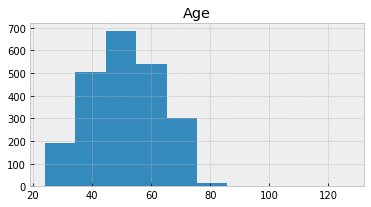

In [7]:
(plt.figure(figsize=(6,3)),
 df['Age'].hist(),
 plt.title('Age')
)
df['Age'].describe()

Há três clientes com mais de 120 anos. Devem ser dados incorretos.

count    2237.000000
mean       51.098346
std        11.701917
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: Age, dtype: float64

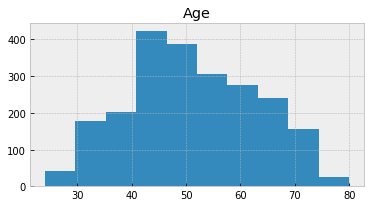

In [8]:
age_limit = 115

(plt.figure(figsize=(6,3)),
 df.query(f"Age < {age_limit}")['Age'].hist(),
 plt.title('Age')
)
df.query(f"Age < {age_limit}")['Age'].describe()

Ao removermos ested cliented, os dados ficam melhor distribuídos. Temos clientes com faixa de idade entre 23 e 80 anos. **75% dos clientes tem entre 43 e 80 anos. Talvez isso demonstre que o púlblico dessa empresa seja um público de meia idade.**

### O cliente mais novo é o que compra mais (gasto)?

In [ ]:
data = df.query(f"Age < {age_limit}")[['Age','MntTotal']].astype(float)

sns.regplot(data=data, x='Age', y='MntTotal'), plt.title("Age x Amount Total")

Aparentemente, não necessariamente a idade influecia no valor gasto nos últimos 2 anos.

### Desconto

- do total, quantos clientes pediram 1 desconto?
- de quem pediu desconto, quantas vezes pediu?